<img alt="" src="src/pycon-ca-logo.png">

# Python for SEO: Web Scraping

In this workshop, I want to show off the open-source tools we (at <a href="https://www.ayima.com/">Ayima</a>) leverage from Python’s ecosystem, and present them in a guided format.

- We’ll first look at the basics of web requests with the requests library and show simple HTML parsing with BeautifulSoup4.
- Then we’ll get into some more advanced details of each, including request sessions, passing cookies, custom user agents and more detailed HTML parsing techniques.
- Finally we’ll conclude by showing how selenium can be used to render JavaScript when making requests.

*Note: please clear all code outputs in this notebook now by selecting `Cell -> All Output -> Clear`*

### Software Versions

In [2]:
%load_ext version_information
%version_information requests, beautifulsoup4, pandas, selenium

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.4.0
OS Darwin 16.7.0 x86_64 i386 64bit
requests 2.18.4
beautifulsoup4 4.6.0
pandas 0.23.0
selenium 3.14.1
Fri Nov 02 13:11:47 2018 PDT

## Web Request Basics

### Making Requests

When browsing the web, you send **HTTP requests** to servers and they send you back **responses**.

<img alt="" src="src/http-request.png">

In [3]:
import requests

In [4]:
# Pull up the docstring
requests.get?

In [5]:
url = 'http://2018.pycon.ca'
page = requests.get(url)

In [6]:
page

<Response [200]>

In [7]:
# Print some HTML
print(page.text[:1000])

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>PyCon Canada 2018</title>
<!-- Our custom CSS --><link rel="stylesheet" href="style.css">
<!-- Font Awesome 4.7 --><link rel="stylesheet" href="static/font-awesome.min.css">
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-64922826-6"></script><script>
        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date());
        gtag('config', 'UA-64922826-6');
    </script>
</head>
<body>
    <!-- Navigation bar -->
    <nav class="navbar sticky-top navbar-expand-lg navbar-light bg-white"><div class="container">
            <a class="navbar-brand" href="https://2018.pycon.ca/">
                <img src="https://d33wubrfki0l68.cloudfront.net/13b0a604db36643231c721dad5c7307922a5e817/b87ff/images/logo.svg" class="d-inline-block align-center" alt="PyCon Canada 2018" 

When browsing the web, servers usually return you **HTML responses**. A succesfull response will have a 200 status code.

<img alt="" src="src/http-response-codes.jpg" style="height:200px">

In [8]:
page.status_code

200

In [9]:
page.history

[<Response [301]>]

In [10]:
requested_page = page.history[0]

In [11]:
requested_page.url

'http://2018.pycon.ca/'

In [12]:
page.url

'https://2018.pycon.ca/'

With Jupyter Notebooks, we can visualize the HTML response. This can be super helpful for debugging and sanity checks.

In [13]:
from IPython.display import HTML

In [14]:
HTML(page.text)

### Parsing HTML

Now let's start parsing data from the HTML. HTML is a markup language where content is contained in tags. Here's the anatomy of a tag:

<img alt="" src="src/html-tag.png" style="height:200px">

We'll use BeautifulSoup to parse our HTML.

In [76]:
from bs4 import BeautifulSoup

In [15]:
soup = BeautifulSoup(page.content, 'html.parser')

In [17]:
# soup

In [19]:
soup.title

<title>PyCon Canada 2018</title>

In [22]:
title = soup.title

In [23]:
type(title)

bs4.element.Tag

In [26]:
# dir(title)

In [27]:
title.text

'PyCon Canada 2018'

In [32]:
# Get the H1

h1 = soup.find('h1')
h1

In [34]:
print(h1)

None


<img alt="" src="src/awkward.jpg" style="height:300px">

In [36]:
# Get the H2

soup.find('h2')

<h2 class="display-4 city-banner">Where is the event?</h2>

In [37]:
h2s = soup.find_all('h2')

In [38]:
len(h2s)

10

In [39]:
h2s

[<h2 class="display-4 city-banner">Where is the event?</h2>,
 <h2 class="text-red mb-0">
                 Where is the event?
             </h2>,
 <h2 class="text-red mb-0">
                 Any accommodations available?
             </h2>,
 <h2 class="text-red mb-0">
                 Childcare
             </h2>,
 <h2 class="text-center display-4 pb-4 post-mid-title">Keynote Speakers</h2>,
 <h2 class="text-red mb-0">
                 Froilán Irizarry
             </h2>,
 <h2 class="text-red mb-0">
                 Holden Karau
             </h2>,
 <h2 class="text-red mb-0">
                 Solmaz Shahalizadeh
             </h2>,
 <h2 class="text-red mb-0">
                 Graham Toppin
             </h2>,
 <h2 class="text-red mb-0">
                 Development Sprints
             </h2>]

In [40]:
[h2.text for h2 in h2s]

['Where is the event?',
 '\n                Where is the event?\n            ',
 '\n                Any accommodations available?\n            ',
 '\n                Childcare\n            ',
 'Keynote Speakers',
 '\n                Froilán Irizarry\n            ',
 '\n                Holden Karau\n            ',
 '\n                Solmaz Shahalizadeh\n            ',
 '\n                Graham Toppin\n            ',
 '\n                Development Sprints\n            ']

In [41]:
[h2.text.strip() for h2 in h2s]

['Where is the event?',
 'Where is the event?',
 'Any accommodations available?',
 'Childcare',
 'Keynote Speakers',
 'Froilán Irizarry',
 'Holden Karau',
 'Solmaz Shahalizadeh',
 'Graham Toppin',
 'Development Sprints']

In [43]:
# Download all the images

imgs = soup.find_all('img')

In [44]:
imgs

[<img alt="PyCon Canada 2018" class="d-inline-block align-center" height="20px" src="https://d33wubrfki0l68.cloudfront.net/13b0a604db36643231c721dad5c7307922a5e817/b87ff/images/logo.svg"/>,
 <img alt="PyCon Canada 2018" class="d-block mx-auto banner-pycon-logo" src="https://d33wubrfki0l68.cloudfront.net/86bcfb2361deb5e91b1168b4e0107add689bfcbc/7ab20/images/logo_perspective.svg"/>,
 <img class="img-fluid" src="https://d33wubrfki0l68.cloudfront.net/7fe77410bf565a166898692e1edfb9343a424e84/3c04b/images/chestnut_hotel_logo.png"/>,
 <img class="img-fluid" src="https://d33wubrfki0l68.cloudfront.net/326413544b4000e245893a4019015fb8979cf3f9/71b07/images/double_tree.jpg"/>,
 <img class="img-fluid" src="https://d33wubrfki0l68.cloudfront.net/ca847ff33287657d65fa15cca7812dc0778041d1/8bef7/images/childcare_image.jpg"/>,
 <img class="img-fluid" src="https://d33wubrfki0l68.cloudfront.net/90c4a5f4fc23ad5fb32aba8bc41f4eab3f9fcd16/bc81e/images/speakers/froilan_styled.png"/>,
 <img class="img-fluid" src=

In [57]:
# How can we get the image URLs?

imgs[0].attrs

{'src': 'https://d33wubrfki0l68.cloudfront.net/13b0a604db36643231c721dad5c7307922a5e817/b87ff/images/logo.svg',
 'class': ['d-inline-block', 'align-center'],
 'alt': 'PyCon Canada 2018',
 'height': '20px'}

In [63]:
import os

def download_image(img_url, f_name) -> None:
    try:
        img = requests.get(img_url)
        f_path = os.path.join('..', 'data', f_name)
        with open(f_path, 'wb') as f:
            f.write(img.content)
        print(f'Saved {img_url} to file {f_path}')
    except:
        print(f'Unable to save {img_url}')

In [67]:
for i, img in enumerate(imgs):
    img_url = img.attrs.get('src', '')
    if img_url:
        f_ext = os.path.splitext(img_url)[-1]
        download_image(img_url, f_name=f'{i}{f_ext}')

Saved https://d33wubrfki0l68.cloudfront.net/13b0a604db36643231c721dad5c7307922a5e817/b87ff/images/logo.svg to file ../data/0.svg
Saved https://d33wubrfki0l68.cloudfront.net/86bcfb2361deb5e91b1168b4e0107add689bfcbc/7ab20/images/logo_perspective.svg to file ../data/1.svg
Saved https://d33wubrfki0l68.cloudfront.net/7fe77410bf565a166898692e1edfb9343a424e84/3c04b/images/chestnut_hotel_logo.png to file ../data/2.png
Saved https://d33wubrfki0l68.cloudfront.net/326413544b4000e245893a4019015fb8979cf3f9/71b07/images/double_tree.jpg to file ../data/3.jpg
Saved https://d33wubrfki0l68.cloudfront.net/ca847ff33287657d65fa15cca7812dc0778041d1/8bef7/images/childcare_image.jpg to file ../data/4.jpg
Saved https://d33wubrfki0l68.cloudfront.net/90c4a5f4fc23ad5fb32aba8bc41f4eab3f9fcd16/bc81e/images/speakers/froilan_styled.png to file ../data/5.png
Saved https://d33wubrfki0l68.cloudfront.net/e4a3cb8f9531024f5da6ffb2b6db2bf8d1606228/cf2a0/images/speakers/holden_styled.png to file ../data/6.png
Saved https://d

In [68]:
!ls ../data/

0.svg    11.svg   14.svg   17.svg   2.png    22.svg   5.png    8.png
1.svg    12.svg   15.svg   18.svg   20.svg   3.jpg    6.png    9.svg
10.jpg   13.svg   16.svg   19.svg   21.svg   4.jpg    7.png    info.txt


Let's check these out...

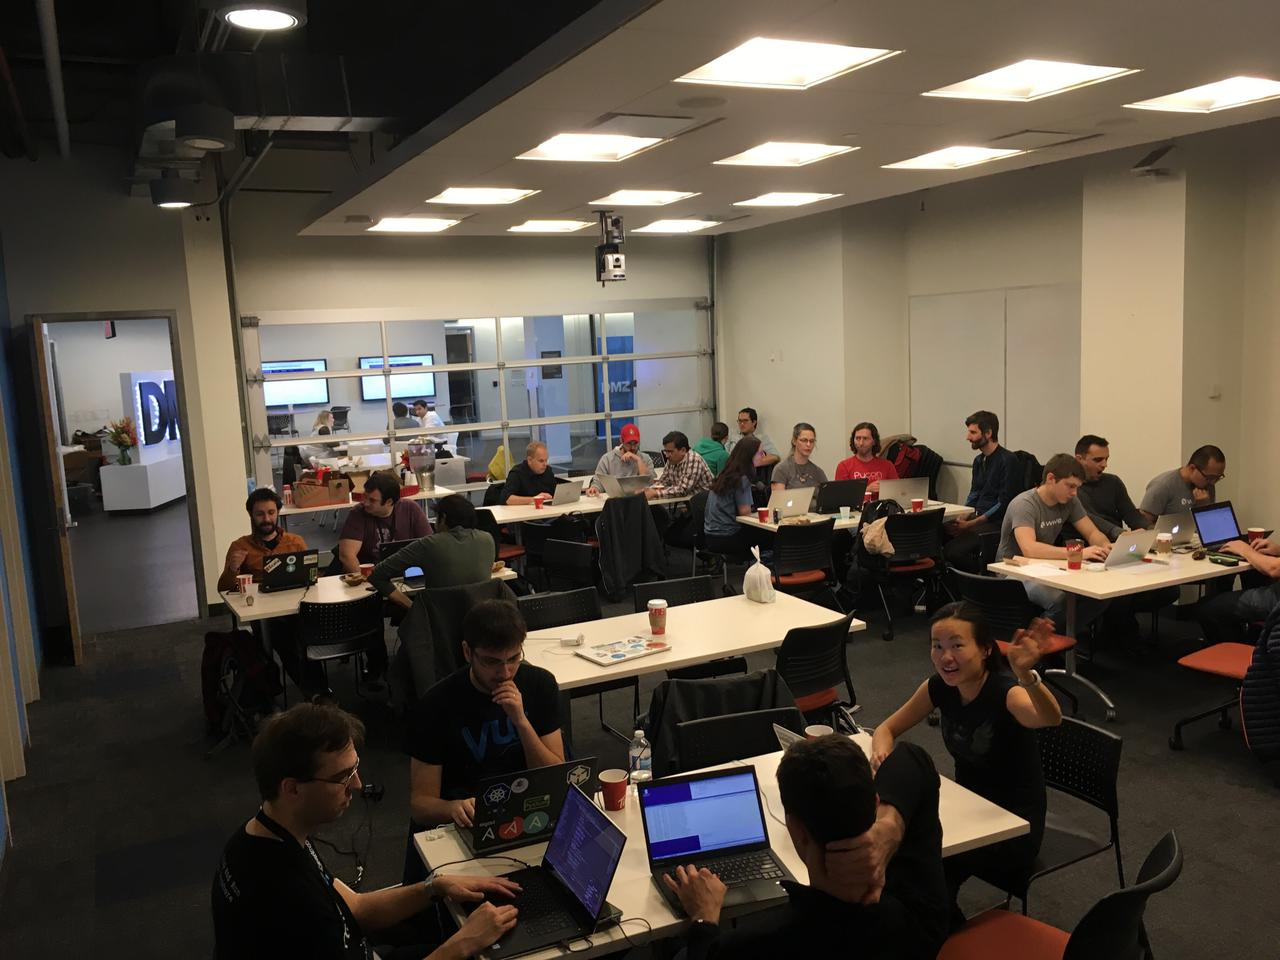

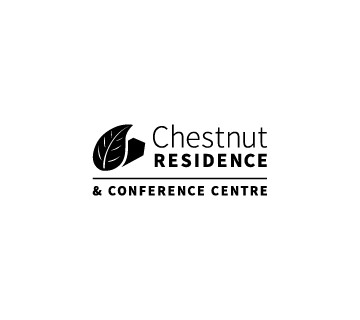

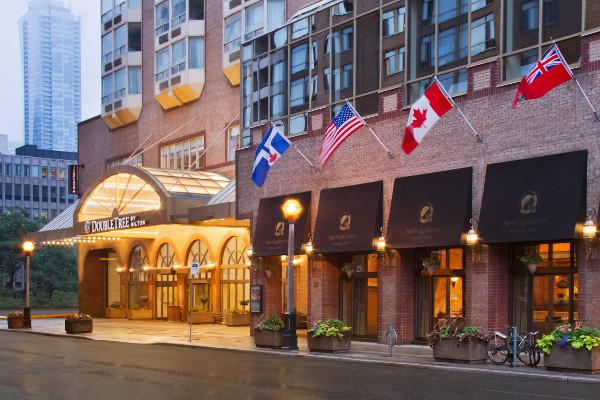

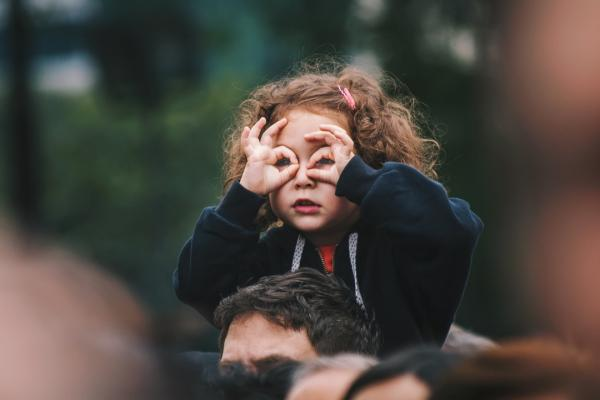

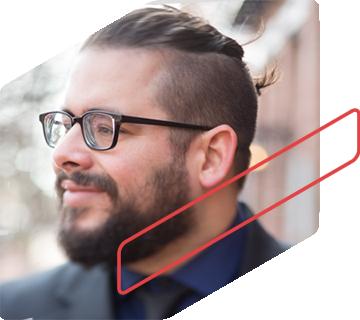

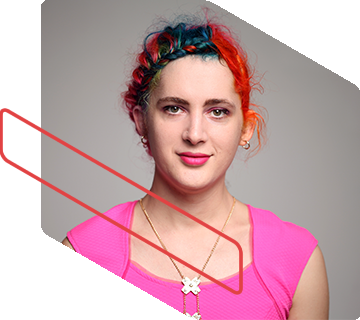

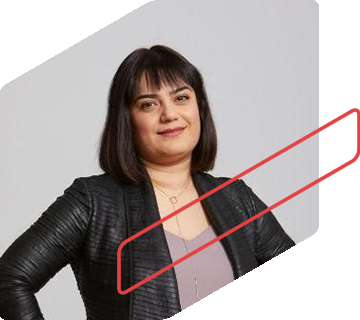

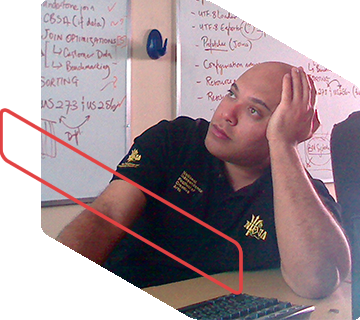

In [72]:
import glob
from IPython.display import Image, display

for img in glob.glob('../data/*'):
    if img.endswith(('jpg', 'png')):
        display(Image(img))

## More Advanced Web Scraping

When making requests, we pass data to the server via the **request header**.

<img alt="" src="src/request-structure.png" style="height:200px">

We can customize the request header in python by using a "session".

### Request Sessions

In [73]:
sess = requests.Session()

In [74]:
# Print the docstring
sess?

In [77]:
sess.headers

{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [100]:
sess.headers = {
    'User-Agent': 'Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)',
}

In [101]:
url = 'https://pythonbytes.fm/'
page = sess.get(url)

In [102]:
page

<Response [200]>

In [103]:
page.request.headers

{'User-Agent': 'Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)'}

In [104]:
sess.close()

In [108]:
# Better to use a with block

with requests.Session() as sess:
    sess.headers['User-Agent'] = 'Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)'
    url = 'https://pythonbytes.fm/'
    page = sess.get(url)

In [109]:
soup = BeautifulSoup(page.content, 'html.parser')

In [110]:
# What does google see for the title?

soup.title

<title>Python Bytes Podcast</title>

In [111]:
# What does google see for the meta description?

soup.find('meta', {'name': 'description'})

<meta content="Python Bytes podcast delivers headlines directly to your earbuds." name="description"/>

In [ ]:
# Homework: pull out the meta "content" above into a string variable

### Passing Cookies

In [57]:
# Passing cookies

url = 'https://www.thenorthface.com'

with requests.Session() as sess:
    print(f'Cookies = {sess.cookies.items()}')
    
    page_ca = sess.get(url)
    
    print(f'Requested: {url}')
    print(f'Went to:   {page_ca.url}')

Cookies = []
Requested: https://www.thenorthface.com
Went to:   https://www.thenorthface.com/en_ca/homepage.html


In [60]:
page_ca.request.headers

{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': 'Edgescape-State=BC; Edgescape-Country=CA; Edgescape-Lat-Long=49.25,-123.13; Edgescape-City=VANCOUVER; Edgescape-Zip=V5K+V5L+V5M+V5N+V5P+V5R+V5S+V5T+V5V+V5W+V5X+V5Y+V5Z+V6A+V6B+V6C+V6E+V6G+V6H+V6J+V6K+V6L+V6M+V6N+V6P+V6R+V6S+V6T+V6Z+V7X+V7Y; _abck=FC3FCB0EE57C32C5ED44EFB0E5B7C55B18F411DF2575000094BDDC5BDCDB7A50~-1~lnMFMheP2pqABUfxZnSRYcwIdNsfiHpnX39HRstgIzg=~-1~-1; bm_sz=E7EBEA1D20104B0A1BF8525653C5398A~QAAQ3xH0GPz0jdJmAQAA2otE1kTQ2ePceBLdi7sb4e+9XerdrEPzGmHcyjrC9XuEQpzxNWzgn22UW7kcFhTPSj9W4SU+YAuII6TBV4sBwHRcequcLOLwzgoqDApLHrDX43AMImgbJxUfpvoT5DQomLGozyUWhwByGKAs1/IAjfULqp4RB9ljUPWKFXissZDddwMmpr0='}

In [65]:
page_ca.request.headers['Cookie'].split(';')

['Edgescape-State=BC',
 ' Edgescape-Country=CA',
 ' Edgescape-Lat-Long=49.25,-123.13',
 ' Edgescape-City=VANCOUVER',
 ' Edgescape-Zip=V5K+V5L+V5M+V5N+V5P+V5R+V5S+V5T+V5V+V5W+V5X+V5Y+V5Z+V6A+V6B+V6C+V6E+V6G+V6H+V6J+V6K+V6L+V6M+V6N+V6P+V6R+V6S+V6T+V6Z+V7X+V7Y',
 ' _abck=FC3FCB0EE57C32C5ED44EFB0E5B7C55B18F411DF2575000094BDDC5BDCDB7A50~-1~lnMFMheP2pqABUfxZnSRYcwIdNsfiHpnX39HRstgIzg=~-1~-1',
 ' bm_sz=E7EBEA1D20104B0A1BF8525653C5398A~QAAQ3xH0GPz0jdJmAQAA2otE1kTQ2ePceBLdi7sb4e+9XerdrEPzGmHcyjrC9XuEQpzxNWzgn22UW7kcFhTPSj9W4SU+YAuII6TBV4sBwHRcequcLOLwzgoqDApLHrDX43AMImgbJxUfpvoT5DQomLGozyUWhwByGKAs1/IAjfULqp4RB9ljUPWKFXissZDddwMmpr0=']

In [88]:
# Pass US-site selection cookie

with requests.Session() as sess:
    sess.cookies.set('CountryPref', 'https://www.thenorthface.com')
    print(f'Cookies = {sess.cookies.items()}')
    
    page_us = sess.get(url)

    print(f'Requested: {url}')
    print(f'Went to:   {page_us.url}')

Cookies = [('CountryPref', 'https://www.thenorthface.com')]
Requested: https://www.thenorthface.com
Went to:   https://www.thenorthface.com/


In [95]:
BeautifulSoup(page_us.content, 'html.parser')\
    .find('title')

<title>The North Face® | Free Shipping – No Minimum</title>

In [94]:
BeautifulSoup(page_ca.content, 'html.parser')\
    .find('title')

<title>Outdoor Gear &amp; Athletic Clothing | The North Face Canada</title>

### SEO Data Extract

In [170]:
keyword = 'running shoes'
url = 'https://www.rei.com/c/mens-shoes/f/f-waterproof?ir=category%3Amens-shoes'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
page

<Response [200]>

**Canonical URL**

In [173]:
soup.find('link', {'rel': 'canonical'})\
    .attrs['href']

'/c/mens-shoes/f/f-waterproof'

**On-page text**

In [174]:
from bs4 import Comment

def el_is_visible(element) -> bool:
    whitelist = [
        'style', 'script', 'head',
        'title', 'meta', '[document]'
    ]
    if element.parent.name in whitelist:
        return False
    if isinstance(element, Comment):
        return False
    return True

text = soup.find_all(text=True)
visible_text = ' '.join([t.strip() for t in text if el_is_visible(t)])

In [175]:
print(visible_text[:1000])

             Skip to main content    Skip to Shop REI categories    Shop REI    REI Outlet    Used Gear    REI Adventures    Classes & Events    Expert Advice    Co-Op Journal    Get Outside                      Cart           Menu              Search                 Sign in My account              Close Sign-in      Error   Error message    User login form           Email     Password     show     Forgot password?    By signing into your account, you agree to REI's Terms of Use and consent to its Privacy Policy .   Sign in  Create an account      Co-op Customer     Member number:   Available dividend: $     Become an REI member  Earn an Annual Dividend, plus get access to exclusive products, events and offers.      My account    Purchase history    Wish lists       Sign out        Stores     Cart      to open cart summary dialog, press down arrow       Close Menu       Camp & Hike     Close this menu    Camp & Hike     Backpacks    Backpacking Packs    Day Packs    Hydration Packs    

In [176]:
# How many words?

len(visible_text.split())

3913

In [180]:
# Is the keyword on the page?

keyword in visible_text.lower()

True

In [181]:
# How many times is the keyword on the page?

visible_text.lower().count(keyword)

18

**Num outlinks**

In [209]:
links = []
for el in soup.find_all('a'):
    if el.has_attr('href'):
        links.append(el.attrs['href'])
links = [link for link in links
         if not link.startswith('#')]
        
import pandas as pd
links = pd.Series(links)

len(links)

978

In [211]:
links.sample(20)

272                                    /c/paddleboarding
628                                /c/womens-sports-bras
2                                                  /used
170                                    /s/climbing-deals
44                                      /c/camp-blankets
588                                  /s/mens-shirt-deals
200                      /c/cycling-clothing-accessories
461                                            /h/travel
571                                      /c/mens-gaiters
715                                /s/kids-climbing-gear
155                                    /c/climbing-packs
319                                          /h/paddling
107                                          /c/dog-gear
376                       /s/mens-running-footwear-deals
432                        /c/cross-country-ski-clothing
59                                     /c/camp-furniture
893    /product/112618/the-north-face-ultra-110-gtx-t...
464                            

In [214]:
# How many product pages?

mask = links.str.contains('/product/')
print(mask.sum())
links[mask]

30


890    /rei-garage/product/133982/teva-arrowood-wp-sh...
891    /product/892886/garmont-dragontail-mnt-gtx-app...
892    /product/113824/merrell-moab-2-wp-low-hiking-s...
893    /product/112618/the-north-face-ultra-110-gtx-t...
894    /product/122169/salomon-x-ultra-3-low-gtx-hiki...
895    /product/120385/merrell-moab-adventure-lace-wa...
896    /product/878533/the-north-face-hedgehog-fastpa...
897    /product/119906/keen-targhee-iii-low-wp-hiking...
898    /product/813279/oboz-firebrand-ii-bdry-hiking-...
899    /product/129503/la-sportiva-spire-gtx-hiking-s...
900    /product/134164/salomon-outline-low-gtx-hiking...
901    /product/135003/merrell-moab-fst-2-low-waterpr...
902    /product/105904/merrell-coldpack-ice-winter-sh...
903    /product/133879/brooks-cascadia-13-gtx-trail-r...
904      /product/873348/oboz-tamarack-hiking-shoes-mens
905    /product/109184/salomon-xa-pro-3d-cs-wp-trail-...
906    /product/128119/asolo-agent-evo-gv-hiking-shoe...
907    /product/113121/la-sport

In [215]:
# How many category pages?

mask = links.str.contains('/c/')
print(mask.sum())
links[mask]

611


24                                   /c/hiking-backpacks
25                                  /c/backpacking-packs
26                                          /c/day-packs
27                             /c/hiking-hydration-packs
28                                 /c/baby-carrier-packs
29                                  /c/hiking-waistpacks
30                                   /c/pack-accessories
31                                              /c/tents
32                                  /c/backpacking-tents
33                                      /c/camping-tents
34                                     /c/roof-top-tents
35                                           /c/shelters
36                                         /c/bivy-sacks
37                                   /c/tent-accessories
38                      /c/sleeping-bags-and-accessories
39                                 /c/mens-sleeping-bags
40                               /c/womens-sleeping-bags
41                             

In [224]:
# How many top-level folder pages

mask = links.str.contains('^/[^/]+$')
print(mask.sum())
links[mask].drop_duplicates()

49


1                      /rei-garage
2                            /used
3                      /adventures
4                          /events
6                            /blog
9                    /ShoppingCart
10          /YourAccountInfoInView
14                 /yaRegistration
17            /PurchaseHistoryView
18                          /lists
19                         /Logoff
797                     /gift-card
799                        /brands
800                    /categories
804                   /opt-outside
808                   /stewardship
815                     /about-rei
818                 /member-thanks
933                         /login
934     /PurchaseTrackingLoginView
951            /free-shipping.html
959    /corporate-group-sales.html
967                        /mobile
dtype: object

In [ ]:
links[mask].drop_duplicates().sort_values

**Number of products**

In [190]:
el_product_num = soup.find('small', {'class': 'WX2_65x5-zxXopkI'})
el_product_num

<small class="WX2_65x5-zxXopkI"> (81 results)</small>

In [191]:
import re
re.findall('(\d+)', el_product_num.text)

['81']

**Schema**

In [199]:
'schema.org' in page.text.lower()

True

In [198]:
re.findall('.{20}schema.org.{20}', page.text.lower())

['{"@context":"http://schema.org","@type":"breadcrum']

In [203]:
json_ld_el = soup.find('script', {'type': 'application/ld+json'})

In [208]:
json_ld_el

<script data-vue-helmet="true" type="application/ld+json">{"@context":"http://schema.org","@type":"BreadcrumbList","itemListElement":[{"@type":"ListItem","position":1,"item":{"@id":"/c/footwear/f/f-waterproof","name":"Footwear"}},{"@type":"ListItem","position":2,"item":{"@id":"/c/mens-footwear/f/f-waterproof","name":"Men's Footwear"}}]}</script>

In [207]:
import json
json.loads(json_ld_el.text)

{'@context': 'http://schema.org',
 '@type': 'BreadcrumbList',
 'itemListElement': [{'@type': 'ListItem',
   'position': 1,
   'item': {'@id': '/c/footwear/f/f-waterproof', 'name': 'Footwear'}},
  {'@type': 'ListItem',
   'position': 2,
   'item': {'@id': '/c/mens-footwear/f/f-waterproof',
    'name': "Men's Footwear"}}]}

## Rendering JS

The requests library is reliable and has an amazing API (like anything by [Kenneth Reitz](https://twitter.com/kennethreitz)). However, it cannot be used to render JS that's imbedded in response HTML.

To get a full view of the DOM, as would be seen by a JS-enabled web browser, we can use selenium.

<img alt="" src="src/selenium-logo.jpeg" style="height:250px">

In [225]:
from selenium import webdriver

### Example 1 - Basic Nav

In [228]:
driver = webdriver.Chrome('/Users/alex/Downloads/chromedriver')

After running the line above, you should have seen a window open for the chromedriver.

In [229]:
# Request a page

driver.get('http://2018.pycon.ca')

You should see the PyCon homepage. Use the window to browse the site, click a link.

In [230]:
driver.current_url

'https://2018.pycon.ca/about/'

Now we are going to use python to click a link programatically. We'll need to select elements using the [selenium API](https://selenium-python.readthedocs.io/locating-elements.html).

In [233]:
driver.find_element_by_link_text?

In [239]:
schedule_button = driver.find_element_by_css_selector('.btn.btn-midnight-blue.navigation-button')

In [248]:
schedule_button.get_attribute('outerHTML')

'<a href="../schedule-day-1/" class="btn btn-midnight-blue navigation-button">\n                                Schedule\n                            </a>'

In [249]:
# Click the link

schedule_button.click()

### Example 2 - Search Bar

Now let's see how we might want to use this in practice. Say we want to view/test internal site search.

In [302]:
url = 'https://www.ikea.com/ca/en/'
driver.get(url)

In [299]:
xpath = "//*[@name='query']"
search_box = driver.find_element_by_xpath(xpath)

In [295]:
search_box.get_attribute('outerHTML')

'<input class="form-control" name="query" id="srch" placeholder="Search..." data-lang="en">'

In [296]:
search_box.send_keys('desk chair')

Did you see that?? The search bar should now read "desk chair". Let's trigger this search with `submit`.

In [297]:
search_box.submit()

You should be taken to the search results page for "desk chair"!

In [ ]:
driver.quit()